# Проектная работа по модулю “Математика и статистика вPython”

### Кошелев Константин

## Загрузка исходных данных и библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
df = pd.read_csv("HR.csv")
df[:3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## Основные статистические  характеристики

Для удобства разделим столбцы "sales" и "salary" на отдельные стобцы заменив текстовые данные числами

In [4]:
data = pd.get_dummies(df, columns = ["sales","salary"],
                             prefix=["sales","salary"])

Основные статистические характеристики

In [7]:
print(data.mean())
print(data.min())
print(data.max())
print(data.var())
print(data.mode())

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales_IT                   0.081805
sales_RandD                0.052470
sales_accounting           0.051137
sales_hr                   0.049270
sales_management           0.042003
sales_marketing            0.057204
sales_product_mng          0.060137
sales_sales                0.276018
sales_support              0.148610
sales_technical            0.181345
salary_high                0.082472
salary_low                 0.487766
salary_medium              0.429762
dtype: float64
satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_montly_hours     96.00
time_spend_company        2.00
Work_accident             0.00
left                      0.00
promotion_la

Графики плотности распределений велечин

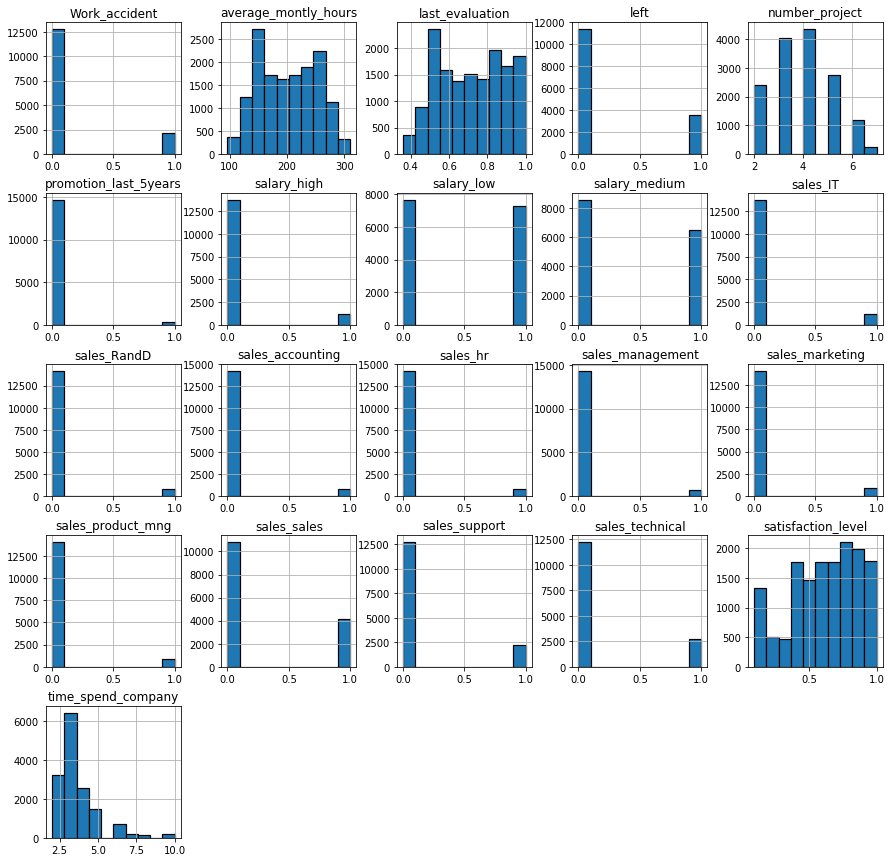

In [8]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

## Кореляционная матрица

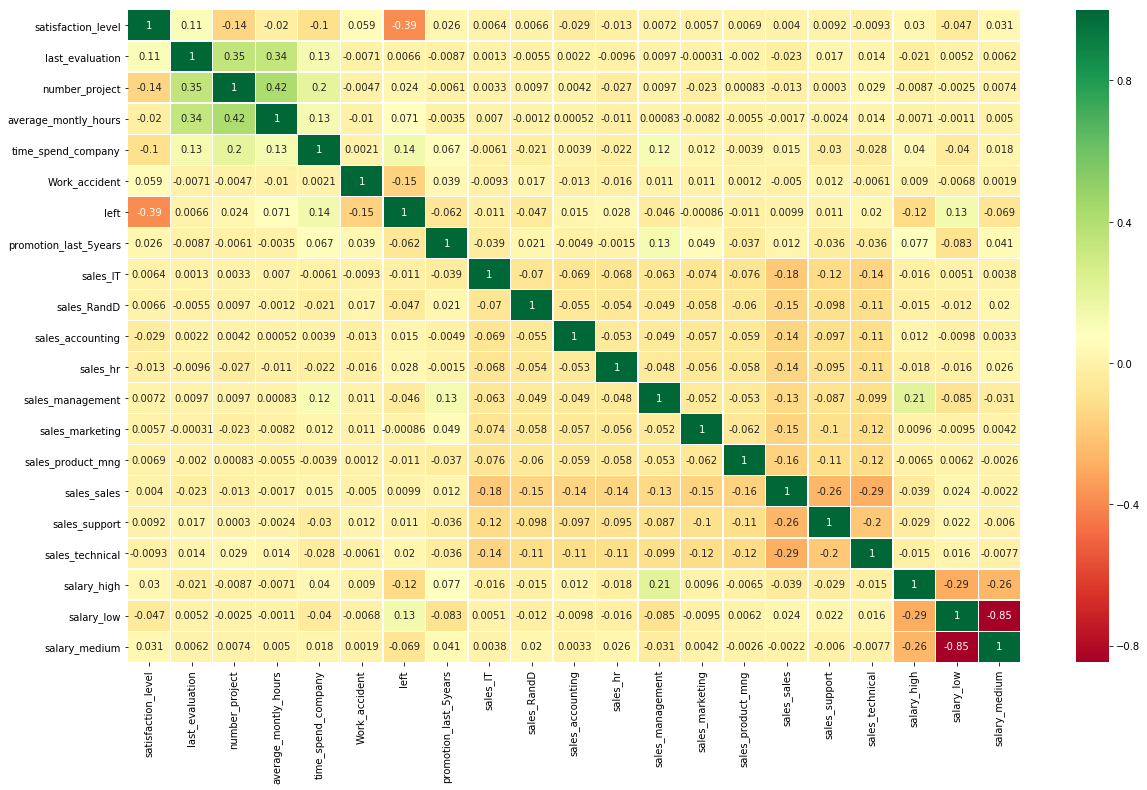

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## Взаимосвязь между переменными 

связь между последней оценкой и количеством часов в месяц

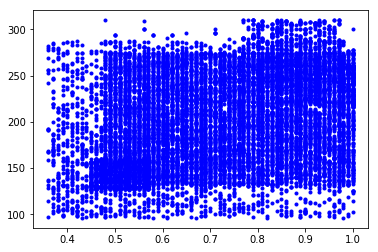

In [10]:
plt.plot(data['last_evaluation'], data['average_montly_hours'], 'b.')

связь между количеством проектов и количеством часов в месяц

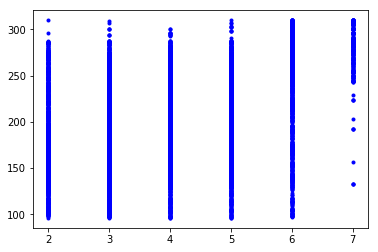

In [11]:
plt.plot(data['number_project'], data['average_montly_hours'], 'b.')

## t-test статистика

In [12]:
print(ttest_ind(data['last_evaluation'], data['average_montly_hours']))
print(ttest_ind(data['last_evaluation'], data['number_project']))

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)
Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)


## Колчиство работников в департаментах

In [16]:
print(df['sales'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


## Распределение сотрудников по зарплатам

Создадим новую колоку для зарплат сотрудников, заменив текстовое значение числом

In [18]:
new_data = data
new_data['salary'] = new_data['salary_low'] + new_data['salary_medium'] * 2 + new_data['salary_high'] * 3
drop_column = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',  'salary_low',  'salary_medium']

new_data = new_data.drop(drop_column, axis=1)

Построим гистограмму для зарплат сотрудников

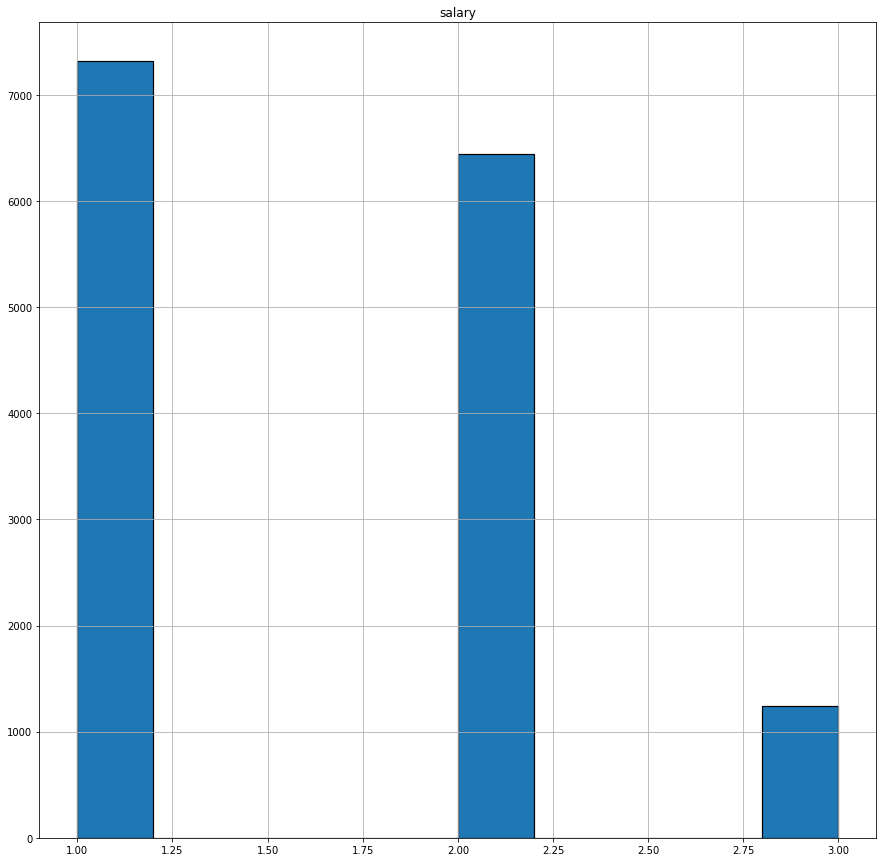

In [19]:
new_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

## Распределение сотрудников по зарплатам и отделам

Создадим новую колоку для зарплат сотрудников, заменив текстовое значение числом, а также создадим список отделеов

In [21]:
department = pd.unique(df['sales'])
new_data = pd.get_dummies(df, columns = ["salary"],
                             prefix=["salary"])

new_data['salary'] = new_data['salary_low'] + new_data['salary_medium'] * 2 + new_data['salary_high'] * 3
drop_column = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high',  'salary_low',  'salary_medium']

new_data = new_data.drop(drop_column, axis=1)

Построим гистограммы для зарплат сотрудников

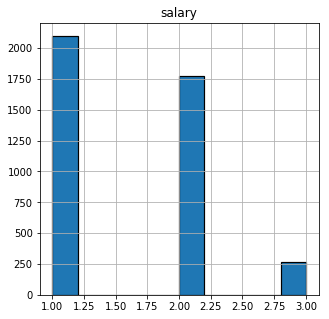

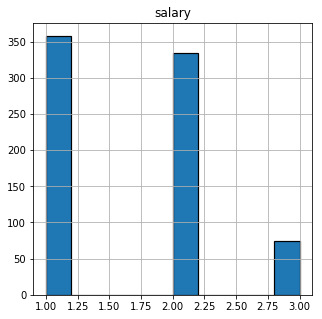

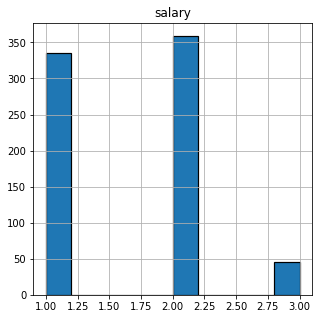

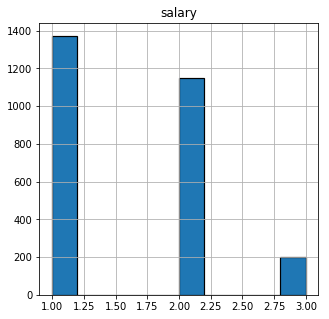

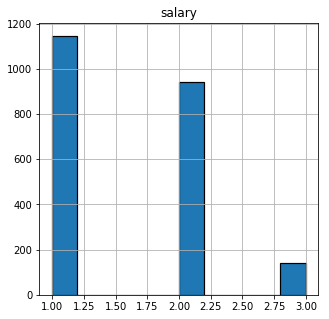

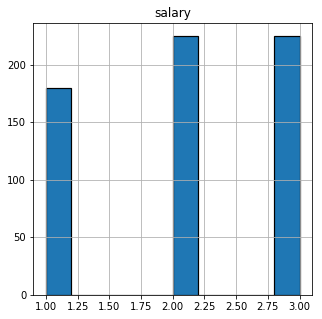

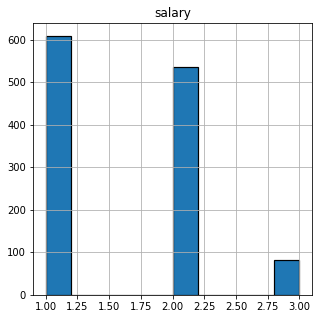

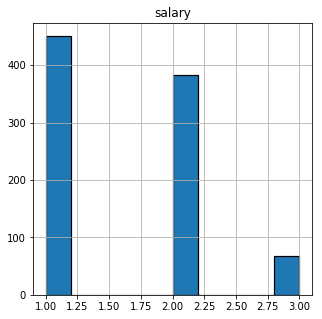

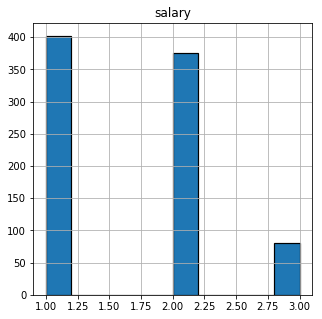

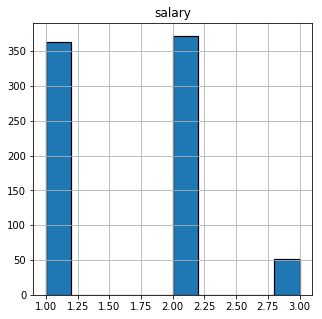

In [23]:
for sales in department:
    new_data[new_data['sales'] == sales].hist(edgecolor='black', linewidth=1.2)
    fig=plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

## Количество сотрудников покинувших компанию

In [24]:
data['left'].sum()

3571

## Почему сотрудники покидают компанию

Из матрицы корреляций выберем занчения у которых большая корреляцией со значением "left" и построим их зависимость

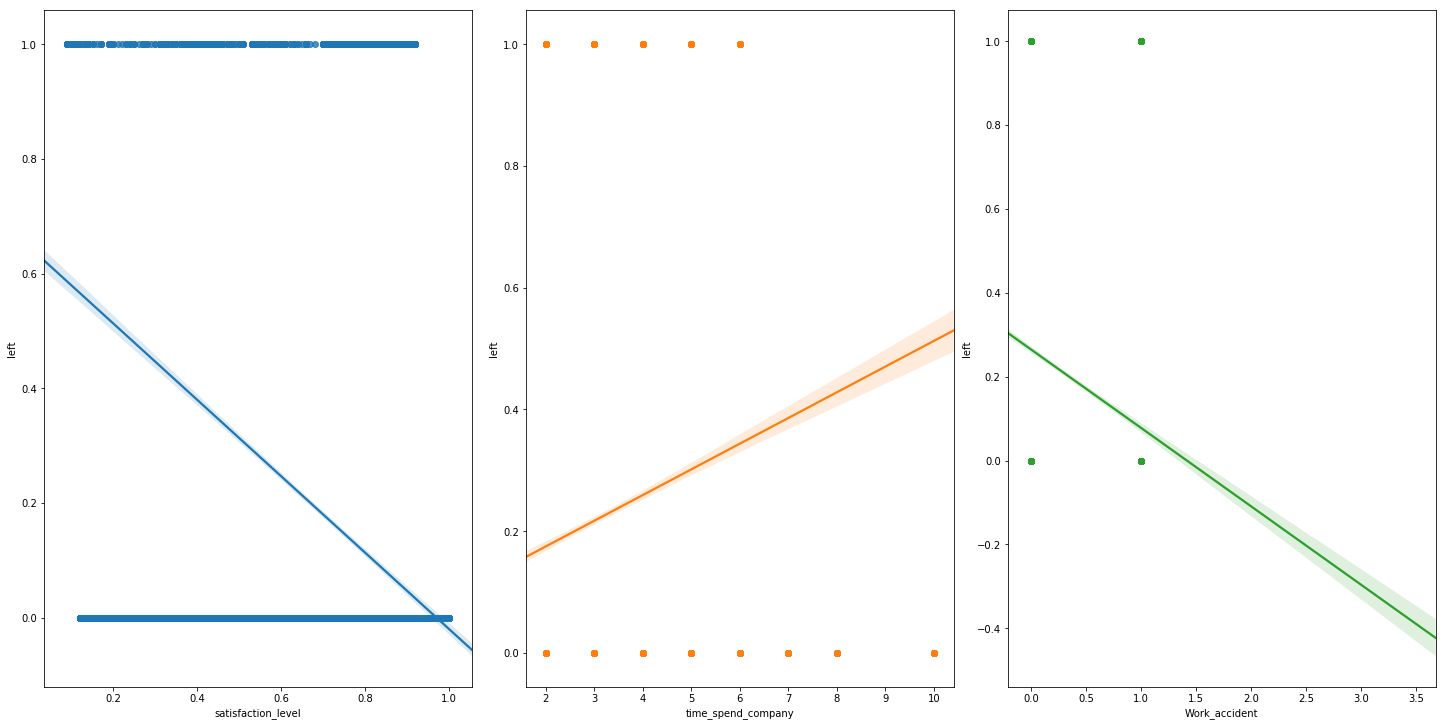

In [26]:
column_sels = ['satisfaction_level', 'time_spend_company', 'Work_accident']
x = data.loc[:,column_sels]
y = data['left']
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Из графиков видно, что основными причинами увольнения становятся проишествия на работе и неудовлетворительные оценки